In [1]:
import urllib.request
url = "https://raw.githubusercontent.com/syedhamidali/test_scripts/master/nearest_nexrad.py"
urllib.request.urlretrieve(url, "nearest_nexrad.py")
import nearest_nexrad as nrnx
nrnx.get_nexrad_location("KGWX")

(33.89667, -88.32889, 476)

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os, glob, sys
import nearest_nexrad as nrnx

In [35]:
IOP = "IOP1"
RADAR_TYPES = ["COW1", "DOW7"]
INSTRUMENTS = ["WSR", "ILN", "UAH"]
BASE_PATH = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022"

def load_data(IOP=IOP, instrument=None, radar_type=None):
    if instrument not in INSTRUMENTS:
        raise ValueError(f"Invalid instrument: {instrument}. Expected one of {INSTRUMENTS}")
    if radar_type is not None and radar_type not in RADAR_TYPES:
        raise ValueError(f"Invalid radar_type: {radar_type}. Expected one of {RADAR_TYPES}")

    if instrument == "WSR":
        path = f"{BASE_PATH}/NEXRAD/{IOP}/KGWX/"
    elif instrument == "ILN":
        if radar_type is None:
            path = f"{BASE_PATH}/Illinois_Mobile_Radar/{IOP}/{RADAR_TYPES[0]}/cmerged/20220322/"
        else:
            path = f"{BASE_PATH}/Illinois_Mobile_Radar/{IOP}/{radar_type}/cmerged/20220322/"
    elif instrument == "UAH":
        path = f"{BASE_PATH}/UAH_Mobile_Radar/"
    if instrument == "WSR":
        files = glob.glob(os.path.join(path, "*_V06.nc"))
    if instrument == "UAH":
        files = glob.glob(os.path.join(path, "*202203*.nc"))
    if instrument == "ILN":
        files = glob.glob(os.path.join(path, "*.nc"))
        print(f"No. of {radar_type} files: {len(files)}")
    else:
        print(f"No. of {instrument} files: {len(files)}")
    files.sort()
    return files

In [4]:
IOP = "IOP1"
cow_files = load_data(IOP=IOP, instrument="ILN", radar_type="COW1")
dow7_files = load_data(IOP=IOP, instrument="ILN", radar_type="DOW7")
kgwx_files = load_data(IOP=IOP, instrument="WSR",)
uah_files = load_data(IOP=IOP, instrument="UAH")

No. of COW1 files: 181
No. of DOW7 files: 167
No. of WSR files: 460
No. of UAH files: 397


In [5]:
def ret_time(files, name):
    time_list = []
    for file in files:
        time = xr.open_dataset(file)['time'].values[0]
        time_list.append(time)
    df = pd.DataFrame(time_list, columns=["time"], dtype="datetime64[ns]")
    df[name] = 1
    return df

In [6]:
cowtime = ret_time(cow_files, "COW1")
dow7time = ret_time(dow7_files, "DOW7")
kgwxtime = ret_time(kgwx_files, "KGWX")
uahtime = ret_time(uah_files, "UAH")

In [8]:
dow7time['DOW7'] = 5
kgwxtime['KGWX'] = 10
uahtime['UAH'] = 15

In [33]:
uahtime.head()

,time,UAH
0,2022-03-22 22:34:17,15
1,2022-03-22 22:35:28,15
2,2022-03-22 22:37:13,15
3,2022-03-22 22:38:12,15
4,2022-03-22 22:39:25,15


In [32]:
uahtime.tail()

,time,UAH
392,2022-03-31 01:36:06,15
393,2022-03-31 01:38:08,15
394,2022-03-31 01:40:09,15
395,2022-03-31 01:42:10,15
396,2022-04-13 20:22:14,15


/depot/dawson29/data/Projects/PERiLS/apps/perils/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


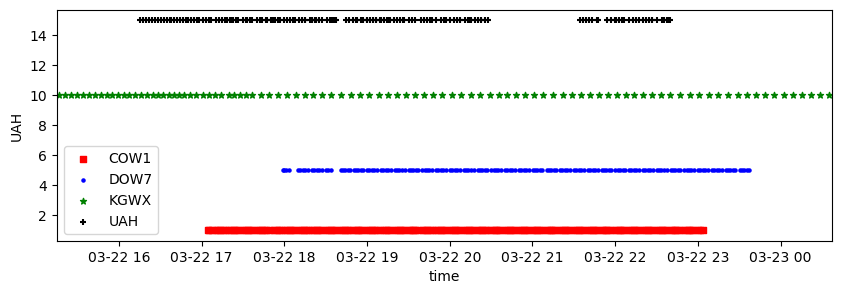

In [9]:
plt.figure(figsize= [10, 3])
ax = plt.axes()
cowtime.plot.scatter(x = "time", y= "COW1",marker = "s", ax=ax, label = "COW1", c= "r")
dow7time.plot.scatter(x = "time", y = "DOW7",marker = ".", ax=ax, label = "DOW7", c = "b")
kgwxtime.plot.scatter(x = "time", y = "KGWX",marker = "*", ax=ax, label = "KGWX", c = 'g')
uahtime.plot.scatter(x = "time",y ="UAH",marker = "+", ax=ax, label = "UAH", c = 'k')
ax.set_xlim(uahtime['time'].min()-timedelta(hours=1), dow7time['time'].max()+timedelta(hours=1))
# ax.legend(loc )
plt.draw()

In [10]:
kgwx_files

['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_000158_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_000908_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_001617_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_002326_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_003034_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_003723_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_004413_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_005116_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_005804_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_010501_V06.nc',
 '/depot/dawson29/da

In [11]:
cow_files

['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_170444.122_to_20220322_170533.794_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_170533.811_to_20220322_170713.162_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_170713.179_to_20220322_170904.969_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_171015.498_to_20220322_171145.636_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_171145.652_to_20220322_171341.476_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/cmerged/20220322/cfrad.20220322_171341.493_to_20220322_171511.559_COW1high_S

In [12]:
uah_files

['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223405.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223517.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223701.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223810.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223920.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_100_20220322161505.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_100_20220322161717.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_100_20220322161927.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_100_20220322162136.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_R

In [13]:
kgwx_files

['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_000158_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_000908_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_001617_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_002326_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_003034_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_003723_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_004413_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_005116_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_005804_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP1/KGWX/KGWX20220322_010501_V06.nc',
 '/depot/dawson29/da

In [50]:
ds = xr.open_dataset(kgwx_files[3])

In [67]:
for file in kgwx_files[10:]:
    ds = xr.open_dataset(file)
    if np.unique(ds.sweep_mode).shape == 1:
        print(ds.time.values)
        print(np.unique(ds.sweep_mode))

In [70]:
ds = xr.open_dataset(file)

In [79]:
ds.where(ds.sweep_mode != b"azimuth_surveillance", drop=True)

<xarray.Dataset>
Dimensions:                           (sweep: 0, r_calib: 1, time: 4320,
                                       range: 1832)
Coordinates:
  * time                              (time) datetime64[ns] 2022-03-23T23:56:...
  * range                             (range) float32 2.125e+03 ... 4.599e+05
Dimensions without coordinates: sweep, r_calib
Data variables: (12/105)
    volume_number                     (sweep) float64 
    platform_type                     (sweep) object 
    primary_axis                      (sweep) object 
    status_xml                        (sweep) object 
    instrument_type                   (sweep) object 
    radar_antenna_gain_h              (sweep) float64 
    ...                                ...
    VEL                               (time, range, sweep) float32 
    SW                                (time, range, sweep) float32 
    ZDR                               (time, range, sweep) float32 
    PHI                               (time, range, sweep) float32 
    RHO                               (time, range, sweep) float32 
    PURPLE_HAZE                       (time, range, sweep) float32 
Attributes: (12/25)
    Conventions:          CF-1.7
    Sub_conventions:      CF-Radial instrument_parameters radar_parameters ra...
    version:              CF-Radial-1.4
    title:                
    institution:          
    references:           
    ...                   ...
    site_name:            XWGK
    scan_name:            Surveillance
    scan_id:              35
    platform_is_mobile:   false
    n_gates_vary:         false
    ray_times_increase:   true

In [14]:
import nearest_nexrad as nrnx

In [18]:
nrnx.nearest_sites(33, -90, 4)

,ID,lat,lon,elev,distance
31,KDGX,32.28000,-89.98444,-99999.0,0.720168
188,TMEM,34.88670,-90.00070,483.0,1.886700
63,KGWX,33.89667,-88.32889,476.0,1.896477
109,KNQA,35.34472,-89.87333,282.0,2.348139


In [37]:
IOP = "IOP2"
cow_files = load_data(IOP=IOP, instrument="ILN", radar_type="COW1")
dow7_files = load_data(IOP=IOP, instrument="ILN", radar_type="DOW7")

No. of COW1 files: 0
No. of DOW7 files: 0


In [66]:
import os
import pandas as pd

# Define the base directory path
basedir = '/depot/dawson29/data/Projects/PERiLS/obsdata/2022'

# Create a dictionary to store the file lists
file_dict = {}

# Loop through the main directories
for maindir in os.listdir(basedir):
    maindir_path = os.path.join(basedir, maindir)
    
    # Check if it's a directory
    if os.path.isdir(maindir_path):
        # Initialize an empty list for the current main directory
        file_dict[maindir] = []
        
        # Loop through the subdirectories
        for subdir, _, files in os.walk(maindir_path):
            # Add the filenames ending with ".nc" and not starting with a dot to the current main directory's list
            file_dict[maindir].extend([os.path.join(subdir, f) for f in files if f.endswith(".nc"
                                                                                           ) and not f.startswith("."
                                                                                                                 )
                                      ]
                                     )


In [67]:
file_dict.keys()

dict_keys(['UAH_MAPNET_Parsivel', 'UAH_Mobile_Radar', 'GOES-16_Lightning_Mapper', 'non-radar_QC_Illinois', 'TTU_plots', 'MADIS_Mesonet', 'GTS_BUFR_Radiosonde_Data', 'TTU_StickNet', 'geo', 'MADIS_GTS_METAR', 'GTS_Surface_METAR_Data', 'NEXRAD', 'Illinois_Mobile_Radar', 'PIPS_data'])

In [79]:
illn = file_dict['Illinois_Mobile_Radar']
illn.sort()
illn[0]

'/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/20220322_170444/cfrad.20220322_170444.122_COW1_v2_s02_el3.40_SUR.nc'

In [80]:
uah = file_dict['UAH_Mobile_Radar']
uah.sort()
uah[0]

'/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_Mobile_Radar/RAW_NA_000_050_20220322223405.nc'

In [90]:
for files in illn:
    if 'IOP1/DOW8/cmerged' in files:
#         print(files)
        print(files.split("/")[-1])
        

cfrad.20220322_200200.536_to_20220322_200221.909_DOW8_SUR.nc
cfrad.20220322_200221.919_to_20220322_200250.425_DOW8_SUR.nc
cfrad.20220322_200250.435_to_20220322_200318.937_DOW8_SUR.nc
cfrad.20220322_200319.134_to_20220322_200354.605_DOW8_SUR.nc
cfrad.20220322_200407.374_to_20220322_200429.117_DOW8_SUR.nc
cfrad.20220322_200429.127_to_20220322_200436.248_DOW8_SUR.nc
cfrad.20220322_200436.257_to_20220322_200457.633_DOW8_SUR.nc
cfrad.20220322_200457.643_to_20220322_200554.687_DOW8_SUR.nc
cfrad.20220322_200554.697_to_20220322_200644.589_DOW8_SUR.nc
cfrad.20220322_200644.598_to_20220322_200713.103_DOW8_SUR.nc
cfrad.20220322_200713.113_to_20220322_200727.359_DOW8_SUR.nc
cfrad.20220322_200727.369_to_20220322_200731.059_DOW8_SUR.nc
cfrad.20220322_200731.069_to_20220322_200741.640_DOW8_SUR.nc
cfrad.20220322_200741.650_to_20220322_200755.898_DOW8_SUR.nc
cfrad.20220322_200755.908_to_20220322_200810.155_DOW8_SUR.nc
cfrad.20220322_200810.165_to_20220322_200831.542_DOW8_SUR.nc
cfrad.20220322_200831.55